Importing 

In [142]:
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import pytesseract
import argparse
import imutils
import cv2
import re
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

Loading Images & preprocessing

In [131]:
orig = cv2.imread("bill2.jpg")
image = orig.copy()
image = imutils.resize(image,width=500)
ratio = orig.shape[1] / float(image.shape[1])

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)
imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

blurred = cv2.GaussianBlur(gray,(5,5),0)


edged = cv2.Canny(blurred,75,200)

Displaying images

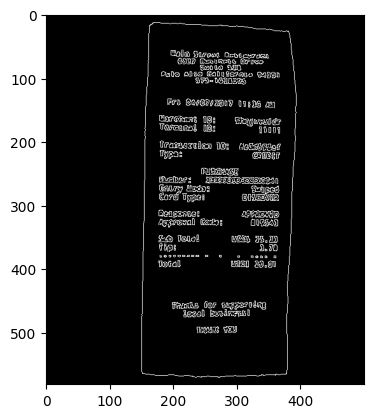

In [132]:
plt.imshow(orig, cmap='gray')
plt.imshow(edged, cmap='gray')


Finding Contors

In [133]:
cnts = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts,key = cv2.contourArea,reverse=True)

recipt = None

for c in cnts:
    peri = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, 0.02 * peri , True)

    if len(approx) == 4:
        recipt = approx
        break

if recipt is None:
    print("Recipt edged are not clear")

Show bounded image

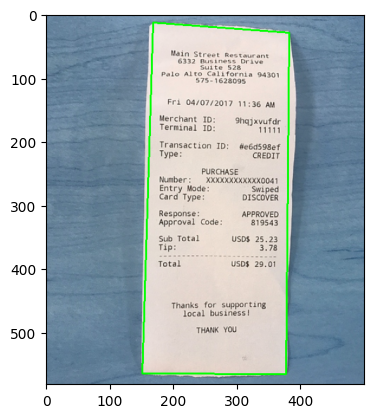

In [137]:
output = image.copy()
cv2.drawContours(output, [recipt],-1,(0,255,0),2)
plt.imshow(output)

Apply transformation

In [138]:
recipt = four_point_transform(orig,recipt.reshape(4,2) * ratio)

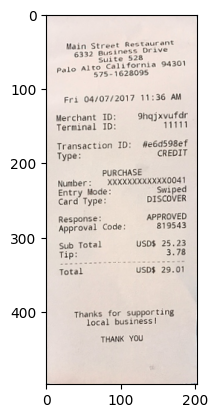

In [139]:
plt.imshow(recipt)

Using PyTesseract for OCR

In [143]:
text = pytesseract.image_to_string(cv2.cvtColor(recipt,cv2.COLOR_BGR2RGB),config="--psm 4")

In [145]:
print(text)

date stcent pestaurant
oth eee
lis

Fri 04/07/2017 11:36 AM
Merchant 1D; 9hqjxvufdr

Terminal 1D: 44111

Transaction 1D: #e6d598ef

Type: CREDIT
PURCHASE

Number: X00KXXXI00XXX0041

Entry Mod ‘swiped
Card Type DISCOVER
Response: ‘APPROVED
‘Approval Code: 819543
Sub Total sos 25.23
Tip 3.78
Total Usps 29.01

Thanks for supporting.
Vocal business!

THANK YOU

